In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import time


In [57]:
class TSP:
    
    def __init__(self,list_pts):
        self.list_pts = list_pts
        self.solution=[]
    
    def solve(self):
        
        current_cost=float('inf')
        
        for k in range(len(self.list_pts)):
            
            current_solution=[]
            
            
            distance_matrix=distance.cdist(self.list_pts, self.list_pts, 'euclidean')

            num_starting_point=k
            starting_point = self.list_pts[num_starting_point,:]
            
            
            
            current_solution.append(starting_point)

            for i in range(len(self.list_pts)):

                distance_matrix[i,i]=float('inf')
                distance_matrix[i,num_starting_point]=float('inf')


            num_next_point=num_starting_point

            for i in [i for i in range(len(self.list_pts)) if  i!=num_starting_point]:

                num_next_point=np.argmin(distance_matrix[num_next_point,:])
                next_point = self.list_pts[num_next_point,:]
                current_solution.append(next_point)

                for j in range(len(self.list_pts)):

                    distance_matrix[j,num_next_point]=float('inf')

            current_solution.append(starting_point)
            if self.cost(current_solution)<self.cost(self.solution):
                self.solution=current_solution
                
                
        return(self.solution)
    
    def display(self):
        
        if (self.solution==[]):
                self.solve()
                
        
        x=[i[0] for i in self.solution]
        y=[i[1] for i in self.solution]

        plt.plot(x, y, marker="o", markerfacecolor="r")
        
    def cost(self,current_list):
        
        if (current_list!=[]):
                return(np.sum(distance.cdist(current_list, current_list, 'euclidean'))/2)
        else:
                return(float('inf'))
        
        

In [94]:
# list of integers from 1 to 99
                           # adjust this boundaries to fit your needs
import random


nums = list(range(0, 30)) # list of integers from 1 to 99
                           # adjust this boundaries to fit your needs
random.shuffle(nums)

pts_list=np.array(nums).reshape((15,2))
pts_list



array([[28, 15],
       [17, 22],
       [29, 18],
       [13, 20],
       [23, 14],
       [ 7, 16],
       [19, 24],
       [ 6, 11],
       [ 4,  2],
       [27,  9],
       [ 3, 25],
       [12, 10],
       [26,  5],
       [ 8,  1],
       [21,  0]])

0.030999999959021807


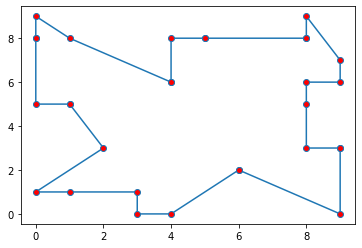

In [80]:
test=TSP(pts_list)


#test.solution

start = time.monotonic()
test.display()
end = time.monotonic()
print(end - start)